## MCDM using AHP

In [3]:
# import important libraries

import numpy as np
import pandas as pd

The file should be in a csv format and arranged like this:


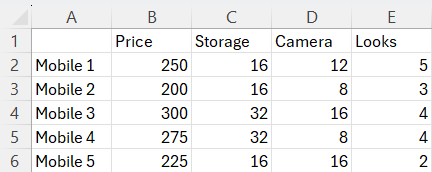

In [4]:
df = pd.read_csv('options.csv')
df = df.drop(df.columns[0], axis=1)
df

,Price,Storage,Camera,Looks
0,250,16,12,5
1,200,16,8,3
2,300,32,16,4
3,275,32,8,4
4,225,16,16,2


Pair wise matrix

In [6]:
# Pair wise matrix 
col_names = df.columns
pair_mat = pd.DataFrame(0, index=np.arange(len(df.columns)), columns=df.columns)
x = 0 
y = 0
for i in col_names:
    for j in col_names:
        if i == j:
            pair_mat.iat[x, y] = 1 
        else:
            if pair_mat.iat[x, y] == 0 :
                z = float(input(f'How important is {i} with respect to {j} ?'))
                pair_mat.iat[x, y] = z
                pair_mat.iat[y, x] = 1/z
        if y != (len(df.columns)-1): 
            y+=1
        else: 
            y = 0
    x+=1

pair_mat


C:\Users\Abdallah\AppData\Local\Temp\ipykernel_2904\3368509043.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pair_mat.iat[y, x] = 1/z
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_2904\3368509043.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pair_mat.iat[x, y] = z
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_2904\3368509043.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pair_mat.iat[y, x] = 1/z


,Price,Storage,Camera,Looks
0,1.000000,5.000000,4.000000,7
1,0.200000,1.000000,0.500000,3
2,0.250000,2.000000,1.000000,3
3,0.142857,0.333333,0.333333,1


Normalizing the pair wise matrix and calculating the criteria

In [36]:
pair_mat_arr = pair_mat.to_numpy()
norm_pair_mat = pair_mat_arr / np.sum(pair_mat_arr, axis=0)
criteria = np.sum(norm_pair_mat, axis=1) / norm_pair_mat.shape[0]
print(f' The criteria weights are : {criteria}')

 The criteria weights are : [0.60337924 0.13639013 0.19566624 0.06456438]


Consistency check

In [37]:
RI = {1:0, 2:0, 3:0.58, 4:0.9, 5:1.12, 6:1.24, 7:1.32, 8:1.41, 9:1.45, 10:1.49}

lambda_arr = np.sum((pair_mat_arr * criteria), axis=1)/criteria
lambda_max = np.sum(lambda_arr, axis=0) / criteria.shape[0]
print(f'lambda_max is {lambda_max}')
consis_in = (lambda_max - criteria.shape[0]) / (criteria.shape[0] - 1)
print(f'consistency index is {consis_in}')
consis_ratio = consis_in / RI[criteria.shape[0]]
print(f'consistency ratio is {consis_ratio}')
if consis_ratio < 0.1:
    print('The weights are consistent')
else:
    print('The weights are not consistent')
    

lambda_max is 4.100742229245654
consistency index is 0.033580743081884634
consistency ratio is 0.03731193675764959
The weights are consistent


Applying criteria weights to options

In [42]:
attr_mat = df.to_numpy()
criteria_ben_mat = np.empty(shape=(attr_mat.shape[1], ))

for i in range(attr_mat.shape[1]):       
    criteria_ben_mat[i] = input(f'for criteria {i+1}, If it is beneficial enter 1, if it is not enter 0')


In [43]:
# normalized weighted matrix calculation
norm_weighted_mat = attr_mat.copy().transpose().astype(float)
for i in range(criteria_ben_mat.shape[0]):
    if criteria[i] == 1:        
        max_i = norm_weighted_mat[i].max()     
        norm_weighted_mat[i] = np.dot(norm_weighted_mat[i],(1/max_i))
        norm_weighted_mat[i] = np.dot(norm_weighted_mat[i],criteria[i])
    else:
        min_i = norm_weighted_mat[i].min()     
        norm_weighted_mat[i] = np.dot((1/norm_weighted_mat[i]),(min_i))
        norm_weighted_mat[i] = np.dot(norm_weighted_mat[i],criteria[i])

norm_weighted_mat = norm_weighted_mat.transpose()
norm_weighted_mat

array([[0.4827034 , 0.13639013, 0.13044416, 0.02582575],
       [0.60337924, 0.13639013, 0.19566624, 0.04304292],
       [0.40225283, 0.06819507, 0.09783312, 0.03228219],
       [0.43882127, 0.06819507, 0.19566624, 0.03228219],
       [0.53633711, 0.13639013, 0.09783312, 0.06456438]])

In [44]:
# calculate performance score

performance_arr = np.sum(norm_weighted_mat, axis=1)
rank_arr= np.empty((0))

for i in range(performance_arr.shape[0]):
    rank_arr = np.append(rank_arr,[(i+1),performance_arr[i]])    
rank_arr = rank_arr.reshape(performance_arr.shape[0],2)
print(rank_arr)

[[1.         0.77536344]
 [2.         0.97847854]
 [3.         0.60056321]
 [4.         0.73496477]
 [5.         0.83512474]]


In [45]:
# sorted scores
sorted_arr = rank_arr[np.flip(rank_arr[:, 1].argsort())]
print(sorted_arr)

[[2.         0.97847854]
 [5.         0.83512474]
 [1.         0.77536344]
 [4.         0.73496477]
 [3.         0.60056321]]
